In [108]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from utils import load_dataset
import imageio
from skimage.transform import resize
from skimage import data
%matplotlib inline

In [53]:
# Loading The data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

type of train_set_x_orig is <class 'numpy.ndarray'>(209, 64, 64, 3)
type pf train_set_y is <class 'numpy.ndarray'>(1, 209)
type of classes: <class 'numpy.ndarray'>(2,)
[b'non-cat' b'cat']
non-cat
cat


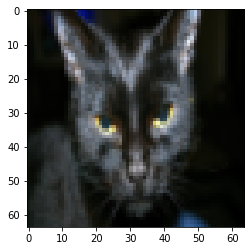

In [6]:
# Example picture
index = 25
plt.imshow(train_set_x_orig[index])
print("type of train_set_x_orig is " + str(type(train_set_x_orig)) + str(train_set_x_orig.shape))
print("type pf train_set_y is " + str(type(train_set_y)) + str(train_set_y.shape))
print("type of classes: " + str(type(classes)) + str(classes.shape))
print(classes)
print(classes[0].decode("utf-8"))
print(classes[1].decode("utf-8"))


In [54]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

In [55]:
print("Number of Training Exaples: m_train = " + str(m_train))
print("Number of Testing examples: m_test = " + str(m_test))
print("Height and Width of each image: num_px = "+ str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")


Number of Training Exaples: m_train = 209
Number of Testing examples: m_test = 50
Height and Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


In [16]:
# Reshaping the training and testing samples

In [56]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print("train_set_x_flatten_shape: " + str(train_set_x_flatten.shape))
print("train_set_y_shape: " + str(train_set_y.shape))
print("test_set_x_flatten_shape: " + str(test_set_x_flatten.shape))
print("test_set_y_shape: " + str(test_set_y.shape))

train_set_x_flatten_shape: (12288, 209)
train_set_y_shape: (1, 209)
test_set_x_flatten_shape: (12288, 50)
test_set_y_shape: (1, 50)


In [57]:
# represent in rgb
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.


In [58]:
# Graded function sigmoid

def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [59]:
# Graded Function: initialize with zeros

def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w, b

In [78]:
# Graded Function: propagate

def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)        # Dimention = (1,m)  
    cost = (-1 / m) * np.sum( Y * np.log(A) + (1-Y) * np.log(1-A) )  # Dimention = Scalar

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1 / m) * np.dot(X, (A - Y).T)       # Dimention = (num_px * num_px * 3, 1)
    db = (1 / m) * np.sum(A - Y)              # Dimention = Scalar 

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [80]:
#Optimization
# Graded Function: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
        
    params  = {
        "w": w,
        "b": b
    }
    grads = {
        "dw": dw,
        "db": db
    }
    
    return params, grads, costs


In [82]:
# Prediction:

def predict(w, b, X):
    m = X.shape[0]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    Y_prediction = (A >= 0.5) * 1.0
    
    return Y_prediction

In [71]:
# A module:

In [83]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [85]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


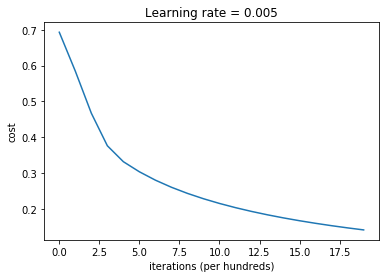

In [86]:
# Lets plot learning curve

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.xlabel('iterations (per hundreds)')
plt.ylabel('cost')
plt.title("Learning rate = " + str(d['learning_rate']))
plt.show()

In [87]:
# Further analysis of learning rate

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



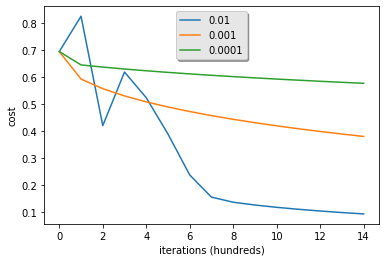

In [88]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

y = 0.0, your algorithm predicts a "non-cat" picture.


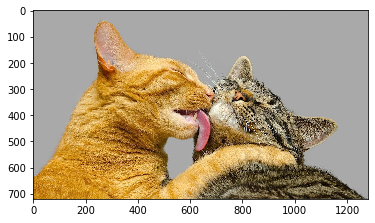